In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [17, 8]

In [2]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [3]:
import torch
import torchaudio

/home/kureta/.conda/envs/ddsp-pytorch/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


In [4]:
sample_rate=44100
n_mfcc = 42
n_mels = 128
n_fft = 2048
hop_length = 512
f_min = 20.
f_max = 8000.

In [5]:
wav = '/home/kureta/Music/violin/CD1/01 Sonata no_1 in G minor, BWV 1001 - 1_ Adagio.wav'

In [6]:
y, _ = librosa.load(wav, sr=sample_rate, offset=7, duration=4)
y = torch.from_numpy(y)

In [7]:
mfcc = torchaudio.transforms.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc,
    log_mels=True,
    melkwargs=dict(
        n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, f_min=f_min, f_max=f_max,
    ),
)

In [8]:
z = mfcc(y)

/home/kureta/.conda/envs/ddsp-pytorch/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore
/home/kureta/.conda/envs/ddsp-pytorch/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/aten/src/ATen/native/SpectralOps.cpp:590.)
  return _VF.stft(input, n_fft, hop_length, win_length, window

In [9]:
y.shape, z.shape

(torch.Size([176400]), torch.Size([42, 345]))

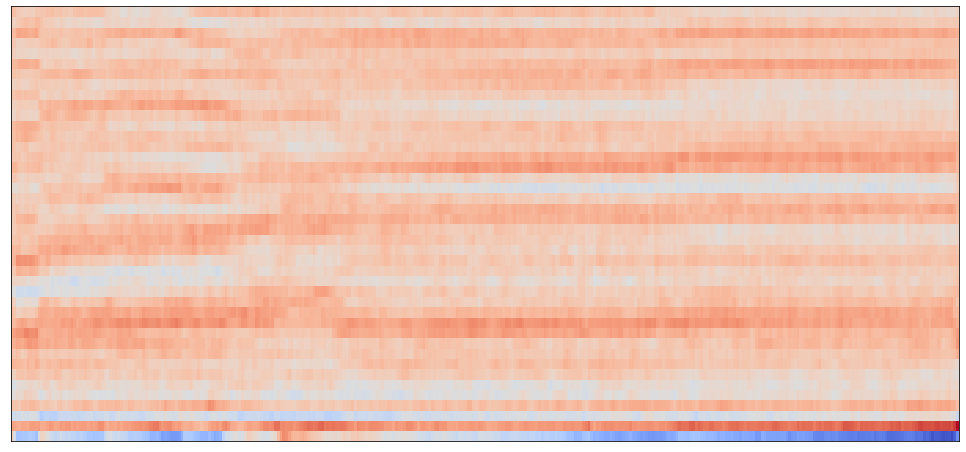

In [10]:
znp = z.numpy()
librosa.display.specshow(znp)

Take MFCC of 2n samples and rebuild it from two subsets of the same samples. This is a shit explanation but, meh.

In [66]:
yw = y[:4096]
y1 = yw[:2048]
y2 = yw[512:2048+512]
y3 = yw[1024:2048+1024]
y4 = yw[1024+512:2048+1024+512]
y5 = yw[-2048:]

In [69]:
zw = mfcc(yw)
z1 = mfcc(y1)
z2 = mfcc(y2)
z3 = mfcc(y3)
z4 = mfcc(y4)
z5 = mfcc(y5)

In [70]:
for i in range(5):
    for j in range(9):
        if all(torch.isclose(z1[:, i], zw[:, j])):
            print('z1', i, j)
        if all(torch.isclose(z2[:, i], zw[:, j])):
            print('z2', i, j)
        if all(torch.isclose(z3[:, i], zw[:, j])):
            print('z3', i, j)
        if all(torch.isclose(z4[:, i], zw[:, j])):
            print('z4', i, j)
        if all(torch.isclose(z5[:, i], zw[:, j])):
            print('z5', i, j)

z1 0 0
z1 1 1
z1 2 2
z2 2 3
z3 2 4
z4 2 5
z5 2 6
z5 4 8


In [71]:
zz = torch.stft(yw, n_fft, hop_length, center=True, pad_mode='reflect')

In [73]:
yy = torch.istft(zz, n_fft, hop_length, center=True)

/home/kureta/.conda/envs/ddsp-pytorch/lib/python3.8/site-packages/torch/functional.py:586: UserWarning: The function torch.irfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.ifft or torch.fft.irfft. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/aten/src/ATen/native/SpectralOps.cpp:602.)
  return _VF.istft(input, n_fft, hop_length, win_length, window, center,  # type: ignore


In [74]:
yy.shape

torch.Size([4096])